<a href="https://colab.research.google.com/github/MariiaS/olid/blob/main/Offensive_speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 7.9MB/s 
     |████████████████████████████████| 1.1MB 12.3MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 194kB 19.9MB/s 
     |████████████████████████████████| 40kB 4.7MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 2.6MB 34.4MB/s 
Mounted at /content/gdrive


The **Offensive Language Identification Dataset (OLID)** contains a collection of 14,200 annotated English tweets using an annotation model that encompasses following three levels:
 
* A: Offensive Language Detection
* B: Categorization of Offensive Language
* C: Offensive Language Target Identification
 
OLID was the official dataset used in the OffensEval: Identifying and Categorizing Offensive Language in Social Media (SemEval 2019 - Task 6) shared task. 

OLID has been in students projects in different universities. To the best of our knowledge, so far it has been used by students at The University of Arizona (USA), Imperial College London (UK), and University of Leeds (UK) Some of the student system papers are available here.

If you used OLID, please refer to this paper:


> Predicting the Type and Target of Offensive Posts in Social Media; Zampieri, Marcos and Malmasi, Shervin and Nakov, Preslav and Rosenthal, Sara and Farra, Noura and Kumar, Ritesh; Proceedings of NAACL; 2019



 

During my experiments with Natural language processing I am going to use **fastai**, which is a framework built on top of PyTorch. **fastai** is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches. It aims to do both things without substantial compromises in ease of use, flexibility, or performance. This is possible thanks to a carefully layered architecture, which expresses common underlying patterns of many deep learning and data processing techniques in terms of decoupled abstractions. These abstractions can be expressed concisely and clearly by leveraging the dynamism of the underlying Python language and the flexibility of the PyTorch library. fastai includes:

* A new type dispatch system for Python along with a semantic type hierarchy for tensors
* A GPU-optimized computer vision library which can be extended in pure Python
* An optimizer which refactors out the common functionality of modern optimizers into two basic pieces, allowing optimization algorithms to be implemented in 4–5 lines of code
* A novel 2-way callback system that can access any part of the data, model, or optimizer and change it at any point during training
* A new data block API

**fastai** is organized around two main design goals: to be approachable and rapidly productive, while also being deeply hackable and configurable. It is built on top of a hierarchy of lower-level APIs which provide composable building blocks. This way, a user wanting to rewrite part of the high-level API or add particular behavior to suit their needs does not have to learn how to use the lowest level.
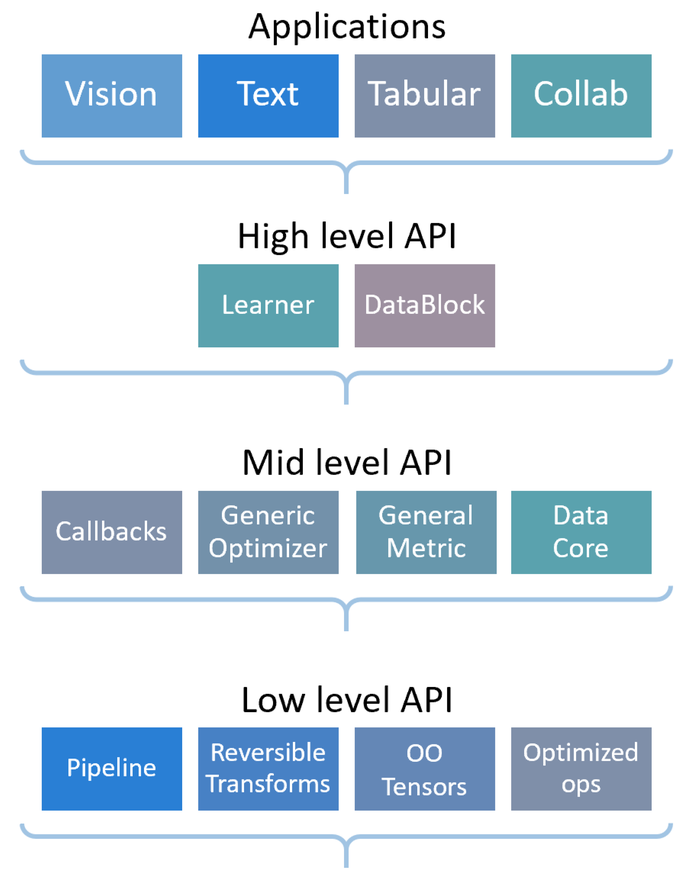

In [2]:
from fastbook import *
from fastai.text.all import *
import pandas as pd

---
Let's take a look at the data



In [3]:
pathToFolder = Path("/content/gdrive/MyDrive/Study/NLP/OLIDv1.0/")
data = pd.read_csv("/content/gdrive/MyDrive/Study/NLP/OLIDv1.0/olid-training-v1.0.tsv", sep='\t', header=0)
data_top = data.head()
data_top


,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans what their take on this is.,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of shit to a volcano. 😂""",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illegals to move into red states,NOT,NaN,NaN


In [ ]:
total_rows = data.count
total_rows

<bound method DataFrame.count of           id  \
0      86426   
1      90194   
2      16820   
3      62688   
4      43605   
...      ...   
13235  95338   
13236  67210   
13237  82921   
13238  27429   
13239  46552   

                                                                                                                                                                                                                                      tweet  \
0                                                                                                                                                                   @USER She should ask a few native Americans what their take on this is.   
1                                                                                                                                                                       @USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL   
2                                                    Amaz

We are going to take the labels from subtask_b: 
**Categorization of Offensive Language**

Level B categorizes the type of offense:
* Targeted Insult (*TIN*): Posts containing insult/threat to an individual, a group, or others;
* Untargeted (*UNT*): Posts containing nontargeted profanity and swearing. Posts with general profanity are not targeted, but they
contain non-acceptable language.
* Not Offensive (*NaN*): Posts that do not contain offense or profanity



---


We are replacing *NaN* label with *NOT* in column for subtask_b to distinguish also not offensive posts from targeted and untargeted posts.

In [4]:
data['subtask_b'].fillna('NOT', inplace=True)
data_top = data.head()
data_top

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans what their take on this is.,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT,NOT,NOT,NaN
3,62688,"@USER Someone should'veTaken"" this piece of shit to a volcano. 😂""",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illegals to move into red states,NOT,NOT,NaN


In [5]:
data.to_csv('cleaned_labels.csv') 
dataLoader = TextDataLoaders.from_csv(path='', csv_fname = 'cleaned_labels.csv', delimiter = ',', valid_pct=0.2, text_col='tweet', label_col='subtask_b', bs=64)


In [6]:
dataLoader.show_batch(max_n=5)

,text,category
0,"xxbos @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user xxmaj this is the xxup pic xxup msm showed us in 1 xxrep 3 9 for # xxup jfkjr plane xxunk xxunk xxup fake xxrep 3 ! xxmaj here is a video , showing another pic xxup msm showed of # jfkjr , even xxup more xxup fake xxrep 3 ! xxup url xxmaj article : xxmaj evidence xxmaj of a xxmaj cover up & & xxmaj why official story is in xxup doubt ! "" xxup url xxup url",NOT
1,xxbos @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user xxup lol ! ! xxmaj same to you ! xxmaj awe ! xxmaj how ’s it feel to want for the first time xxunk ? ! xxmaj is that a new feeling for you ? xxmaj has mommy kept you on the xxunk all these years and now you do n’t know how to fend for yourself ? !,UNT
2,xxbos @user xxup this xxup is a xxup no xxup xxunk . xxup if xxup she xxup stands xxup for xxup what xxup she xxup says xxup she xxup does xxup she xxup has xxup to xxup vote xxup against xxup him xxup if xxup she xxup is xxup lying xxup she xxup deserves xxup to xxup be xxup xxunk xxup and xxup defeated . xxup we xxup will xxup see xxup if xxup she xxup played xxup the xxup pro xxup choice xxup xxunk xxup to xxup get xxup elected xxup or xxup if xxup she xxup is xxup just xxup another xxup xxunk xxup xxunk,TIN
3,"xxbos @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user really xxmaj and then "" xxup where in the xxup world does xxmaj antifa fit into xxunk out xxmaj xxunk ? xxmaj and boy oh boy xxmaj xxunk also apparently believes the notion that there are people who actually "" deny climate "" i kid you not ! i think xxmaj rod xxmaj xxunk 's coming to escort xxmaj xxunk back to ' the zone ' """,NOT
4,xxbos @user xxup for xxup the xxup xxunk xxup and xxup the xxup trumps xxup and xxup the xxup xxunk .. xxup but xxup not xxup for xxup we xxup the xxup people xxup or xxup students xxup or xxup teachers xxup and xxup lets xxup not xxup even xxup talk xxup about xxup the xxup things xxup that a xxup majority xxup of xxup the xxup american xxup people xxup expect xxup like xxup healthcare & & xxup gun xxup control ! xxup nothing xxup but $ $ xxup for @user xxup and xxup xxunk !,TIN




---


**ASGD Weight-Dropped LSTM**, or **AWD-LSTM**, is a type of recurrent neural network that employs DropConnect for regularization, as well as NT-ASGD for optimization - non-monotonically triggered averaged SGD - which returns an average of last iterations of weights. Additional regularization techniques employed include variable length backpropagation sequences, variational dropout, embedding dropout, weight tying, independent embedding/hidden size, activation regularization and temporal activation regularization.
[Regularizing and Optimizing LSTM Language Models; Stephen Merity, Nitish Shirish Keskar, Richard Socher; 2017](https://arxiv.org/abs/1708.02182)

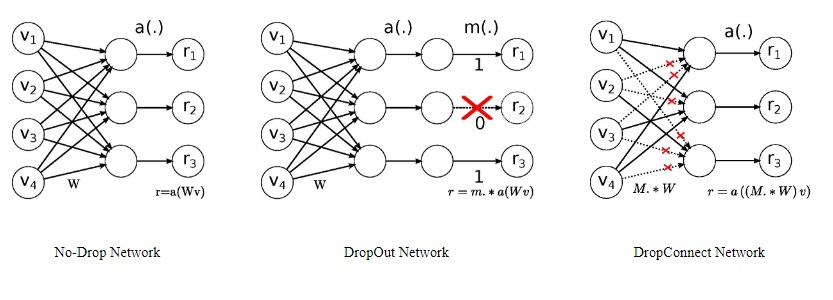

Source – Regularization of Neural Networks using DropConnect

In [11]:
learn = text_classifier_learner(dataLoader, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [12]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.987557,0.749469,0.660876,05:40


epoch,train_loss,valid_loss,accuracy,time
0,0.720965,0.642520,0.724320,15:20
1,0.627001,0.595938,0.752266,15:20
2,0.574646,0.595119,0.755665,15:24
3,0.510524,0.595486,0.757553,15:15


To analyse the results, we would like to check what are the most difficult texts for the NN

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

In [14]:
interp.plot_top_losses(9)

,input,target,predicted,probability,loss
0,xxbos @user xxup uk xxmaj govt non announcements are the only xxunk and affordable policy under xxmaj labour or xxmaj conservatives for decades . xxmaj designed for a xxunk . xxmaj no immediate xxunk required . xxmaj never likely to ever be implemented . xxmaj its xxunk but sadly it has its xxunk effect .,UNT,NOT,0.9774008393287659,7.5004448890686035
1,xxbos @user xxmaj wow it took 36 years ? xxmaj bet this would of never came up if he had not been choose for supreme xxmaj court . xxmaj shows the liberals for what they really are . xxmaj in a way that 's a good thing 😁,UNT,NOT,0.9828740358352661,6.3210930824279785
2,xxbos @user tbh it xxunk as fuck tho,NOT,TIN,0.6111114025115967,5.945420742034912
3,xxbos @user xxmaj if someone is being too nice to you at happy hour and asking probing questions about what you do at xxmaj xxunk xxmaj citizen … xxunk sure to troll them and say you 're with xxmaj antifa or something .,UNT,NOT,0.9578500986099243,5.82453727722168
4,xxbos @user xxmaj sounds like you 're a xxmaj fascist .,UNT,TIN,0.9162297248840332,5.785214424133301
5,xxbos @user @user @user xxmaj antifa . xxmaj yeah it 's a fringe organization . xxmaj just like those xxunk of humanity i grew up around . xxmaj most of em ended up meth heads and xxunk . xxmaj some are republican alt - right activists . i guess we 're all a product of our environment .,UNT,NOT,0.8298293352127075,5.528747081756592
6,xxbos @user xxmaj it ’s all liberals have . xxmaj they are truly vile .,NOT,TIN,0.9944815635681152,5.362054347991943
7,xxbos @user @user @user @user xxmaj the xxunk system is controlled by liberals and works to xxunk the minds of our children . xxmaj the chains of mental xxunk must be removed in order to save the future of our great nation 🇺 🇸,UNT,NOT,0.829643964767456,5.330833911895752
8,"xxbos @user i mean , the logic "" behind their claim means that in the 90 's the xxmaj liberals felt it was xxup ok for a man to abuse women … that 's xxunk what they are saying … and that the xxmaj conservatives were in the right … right ? """,UNT,NOT,0.897031307220459,5.126399040222168


Indeed, some results can be hardly interpret even by the human eyes.

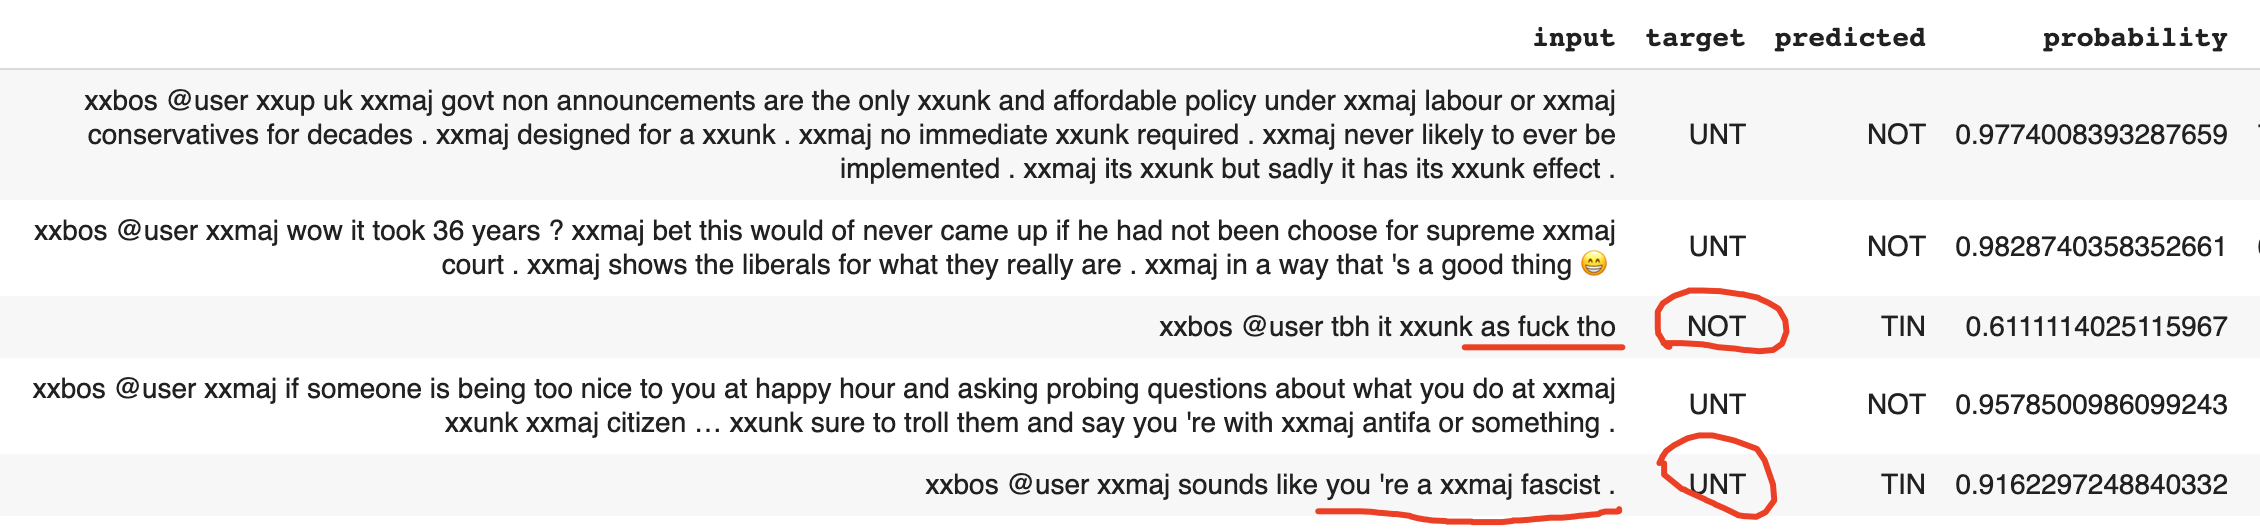